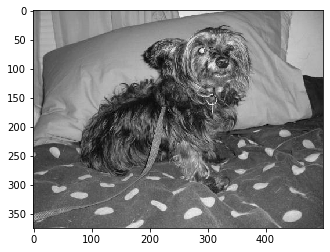

In [24]:
import numpy as ny
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "C:/Users/HP/Miniconda3/Learning_practise/kagglecatsanddogs_3367a/PetImages"
CATEGORIES = ["Dog","Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [8]:
print(img_array.shape)

(375, 500)


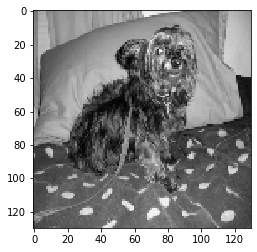

In [21]:
IMG_SIZE = 130

new_array=cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [26]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
        
create_training_data()

In [27]:
print(len(training_data))

24946


In [28]:
import random

random.shuffle(training_data)

In [29]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
1
1
0
1
0
0


In [31]:
X=[]
y=[]

In [33]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X=ny.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [34]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [36]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

In [37]:
X[1]

array([[[ 51],
        [ 48],
        [ 47],
        ...,
        [ 12],
        [ 13],
        [ 13]],

       [[ 50],
        [ 48],
        [ 47],
        ...,
        [  9],
        [  8],
        [  8]],

       [[ 51],
        [ 48],
        [ 50],
        ...,
        [  8],
        [  6],
        [  6]],

       ...,

       [[192],
        [198],
        [183],
        ...,
        [114],
        [120],
        [109]],

       [[192],
        [187],
        [179],
        ...,
        [119],
        [121],
        [111]],

       [[172],
        [177],
        [194],
        ...,
        [135],
        [127],
        [130]]], dtype=uint8)